In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

In [ ]:
ost_df = pd.read_csv('../../data/processed/ost_list_endgame.csv')

feature_cols = [
    'popularity', 'danceability', 'energy', 'loudness', 
    'mode', 'acousticness', 'instrumentalness',
    'valence', 'tempo',
]

genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
    'Mystery', 'Romance', 'Science Fiction', 'Thriller', "TV Movie",
    'War', 'Western'
] 

X = ost_df[feature_cols]

y = ost_df[genre_columns].fillna(0).astype(int).idxmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_clf = LogisticRegression(
    # max_iter=3000,
    # class_weight="balanced"
)
lr_clf.fit(X_train_scaled, y_train)


# 평가
y_pred = lr_clf.predict(X_test_scaled)
print("test accuracy:", accuracy_score(y_test, y_pred))
print("weighted f1-score:", f1_score(y_test, y_pred, average="weighted"))
print("macro f1-score:", f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

# 각 클래스 확률
y_pred_proba = lr_clf.predict_proba(X_test_scaled)
print("classes:", lr_clf.classes_)
print(y_pred_proba)

proba = lr_clf.predict_proba(X_test_scaled)
classes = lr_clf.classes_
true = y_test.to_numpy()


def topk(k):
    topk = np.argsort(proba, axis=1)[:, ::-1][:, :k]
    topk_labels = classes[topk]

    return np.mean([true[i] in topk_labels[i] for i in range(len(true))])

print("Top-1 acc:", topk(1))
print("Top-3 acc:", topk(3))
print("Top-5 acc:", topk(5))

test accuracy: 0.377222320014082
weighted f1-score: 0.258895841601974
macro f1-score: 0.04058984946911738
                 precision    recall  f1-score   support

         Action       0.00      0.00      0.00       763
      Adventure       0.00      0.00      0.00       227
      Animation       0.00      0.00      0.00       128
         Comedy       0.39      0.89      0.54      2118
          Crime       0.00      0.00      0.00       286
    Documentary       0.00      0.00      0.00       404
          Drama       0.32      0.18      0.23      1418
         Family       0.00      0.00      0.00        20
        Fantasy       0.00      0.00      0.00        15
        Foreign       0.00      0.00      0.00         5
        History       0.00      0.00      0.00         4
         Horror       0.00      0.00      0.00       152
          Music       0.00      0.00      0.00        44
        Mystery       0.00      0.00      0.00        22
        Romance       0.00      0.00  

c:\Users\guswl\miniconda3\envs\mlstudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guswl\miniconda3\envs\mlstudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\guswl\miniconda3\envs\mlstudy_env\Lib\site-

In [7]:
genre_counts = ost_df[genre_columns].fillna(0).astype(int).sum().sort_values(ascending=False)
print(genre_counts) # 영화 장르 수

Drama              13085
Comedy             11530
Romance             6092
Thriller            3980
Action              3470
Crime               2936
Music               2903
Documentary         2011
Family              1984
Adventure           1875
Horror              1532
Fantasy             1245
Science Fiction     1213
Mystery             1046
Animation            933
History              584
Foreign              523
War                  503
Western              279
TV Movie             202
dtype: int64


Selected idx=13647: I Don’t Wanna Live Forever (Fifty Shades Darker) - ZAYN
- Comedy: 37.1%
- Drama: 20.1%
- Action: 18.7%
- Documentary: 5.5%
- Adventure: 5.4%
- Crime: 4.3%
- Horror: 3.2%
- Animation: 2.4%
- Romance: 0.9%
- Thriller: 0.8%


C:\Users\guswl\AppData\Local\Temp\ipykernel_14556\2747781250.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  song_df["mode"] = song_df["mode"].astype(str).str.strip().str.lower().replace({"major": 1, "minor": 0})


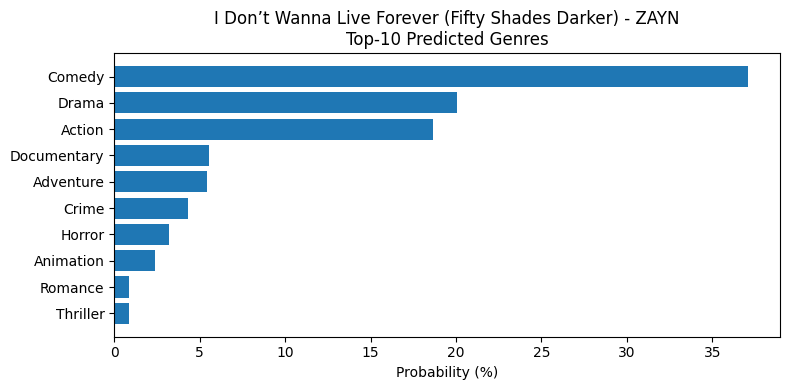

In [ ]:
# 음악 활용 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

song_df = pd.read_csv('../../data/raw/song_track.csv')

if "mode" in song_df.columns:
    song_df["mode"] = song_df["mode"].astype(str).str.strip().str.lower().replace({"major": 1, "minor": 0})

for c in feature_cols:
    song_df[c] = pd.to_numeric(song_df[c], errors="coerce")

# 인덱스 변경
idx = 13647 # I Don’t Wanna Live Forever (Fifty Shades Darker) - ZAYN
music_row = song_df.iloc[idx]


exp_X = pd.DataFrame([music_row[feature_cols].to_dict()])[feature_cols]
exp_X_scaled = scaler.transform(exp_X) 


proba = lr_clf.predict_proba(exp_X_scaled)[0]
classes = lr_clf.classes_

track = music_row.get("track_name", "")
artist = music_row.get("artist_name", "")

k = 10
order = np.argsort(proba)[::-1][:k]
print(f"idx = {idx}: {track} - {artist}")

for j in order:
    print(f"- {classes[j]}: {proba[j]*100:.1f}%")


labels = classes[order]
scores = proba[order] * 100

plt.figure(figsize=(8,4))
plt.barh(labels[::-1], scores[::-1])
plt.xlabel("Probability (%)")
plt.title(f"{track} - {artist}\nTop-{k} Predicted Genres")
plt.tight_layout()
plt.show()

idx = 108043: Billie Jean - Michael Jackson
- Comedy: 41.9%
- Action: 21.4%
- Drama: 17.8%
- Documentary: 4.9%
- Crime: 3.9%
- Adventure: 3.3%
- Mystery: 2.0%
- Animation: 1.9%
- Horror: 1.4%
- Romance: 0.6%


C:\Users\guswl\AppData\Local\Temp\ipykernel_14556\3497029258.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  song_df["mode"] = song_df["mode"].astype(str).str.strip().str.lower().replace({"major": 1, "minor": 0})


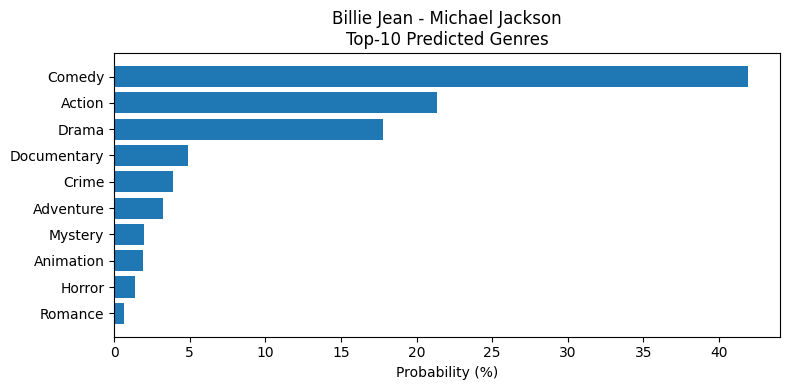

In [ ]:
# 음악 활용 코드2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

song_df = pd.read_csv('../../data/raw/song_track.csv')

if "mode" in song_df.columns:
    song_df["mode"] = song_df["mode"].astype(str).str.strip().str.lower().replace({"major": 1, "minor": 0})

for c in feature_cols:
    song_df[c] = pd.to_numeric(song_df[c], errors="coerce")

# 인덱스 변경
idx = 108043 # Billie Jean - Michael Jackson
music_row = song_df.iloc[idx]


exp_X = pd.DataFrame([music_row[feature_cols].to_dict()])[feature_cols]
exp_X_scaled = scaler.transform(exp_X) 


proba = lr_clf.predict_proba(exp_X_scaled)[0]
classes = lr_clf.classes_

track = music_row.get("track_name", "")
artist = music_row.get("artist_name", "")

k = 10
order = np.argsort(proba)[::-1][:k]
print(f"idx = {idx}: {track} - {artist}")

for j in order:
    print(f"- {classes[j]}: {proba[j]*100:.1f}%")


labels = classes[order]
scores = proba[order] * 100

plt.figure(figsize=(8,4))
plt.barh(labels[::-1], scores[::-1])
plt.xlabel("Probability (%)")
plt.title(f"{track} - {artist}\nTop-{k} Predicted Genres")
plt.tight_layout()
plt.show()